In [4]:

%load_ext autoreload

%autoreload 2


from vision.ssd.mobilenetv1_ssd import create_mobilenetv1_ssd, create_mobilenetv1_ssd_predictor
from vision.utils.misc import Timer
import cv2
import sys





In [5]:
%matplotlib inline
from matplotlib import pyplot as plt

In [33]:

net_type = "mb1-ssd"
model_path = "models/gun_model_2.21.pth"
label_path = "models/open-images-model-labels.txt"
image_path = "guns.jpg"

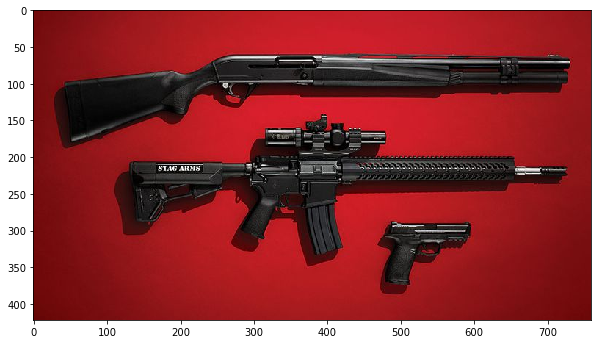

In [34]:


class_names = [name.strip() for name in open(label_path).readlines()]


net = create_mobilenetv1_ssd(len(class_names), is_test=True)

net.load(model_path)


predictor = create_mobilenetv1_ssd_predictor(net, candidate_size=200)
orig_image = cv2.imread(image_path)
rgb_image = cv2.cvtColor(orig_image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(rgb_image)
plt.show()


In [35]:

boxes, labels, probs = predictor.predict(rgb_image, 10, 0.4)

for i in range(boxes.size(0)):
    box = boxes[i, :]
    cv2.rectangle(rgb_image, (box[0], box[1]), (box[2], box[3]), (255, 255, 0), 4)
    #label = f"""{voc_dataset.class_names[labels[i]]}: {probs[i]:.2f}"""
    label = f"{class_names[labels[i]]}: {probs[i]:.2f}"
    cv2.putText(rgb_image, label,
                (box[0] + 20, box[1] + 40),
                cv2.FONT_HERSHEY_SIMPLEX,
                1,  # font scale
                (255, 0, 255),
                2)  # line type


Inference time:  0.006974935531616211


Found 3 objects. The output image is run_ssd_example_output.jpg


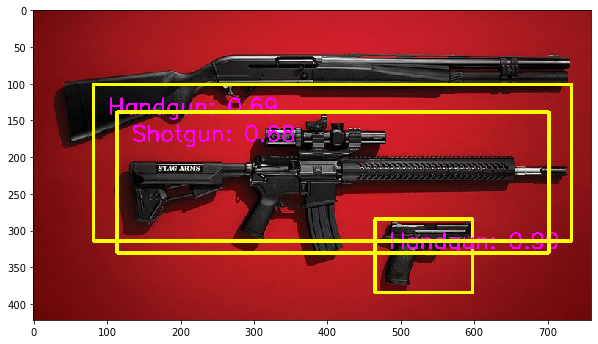

In [36]:
#path = "run_ssd_example_output.jpg"
#cv2.imwrite(path, orig_image)
print(f"Found {len(probs)} objects. The output image is {path}")


# View the sampled input image before transform
plt.figure(figsize=(10,10))
plt.imshow(rgb_image)
plt.show()
